Work!
---

In [46]:
library(ggplot2)
library(reshape2)
library(pheatmap)
library(genefilter) # for rowttests
library(nlme)
data(Rail)

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


**Exericse 0**

Using base graphics, make a 2 x 2 grid for plotting.

Top left
    - Generate 100 random numbers from a t-distribution with 5 degrees of freedom
    - Plot a normalized histogram (i.e. area sums to 1) with 8 breaks
    - Overlay a smoothed density estimate (using `density`) in orange
    - Overlay the true density estimate (using `dt`) in red
    - Add a rug
    
Tor right
    - Using the `iris` data set, make a scatter plot of Sepal length agaisnt Sepal width. Color the points by Species.
    - Add your own title and x and y lables
    
Bottom left
    - Generate 100 numbers from a Poisson distribution with rate = 3
    - Plot a bar chart showing the counts for each value
    
Bottom right
    - Make a box and whiskers plot of the 4 numeric variables in the `iris` data set
    - Show vertical labels for all Species names
    - Adjust the margins so that the labels are visible using the `mar` (bottom, left, top, right) parameter. You can see the default values with `par()$mar`. Remember to restore the orignal parameters at the end.
    
Save the plot as a Portable Neetwork Graphics (png) file.

In [47]:
head(Rail)

,Rail,travel
1,1,55
2,1,53
3,1,54
4,2,26
5,2,37
6,2,32


#### Exercise 1

- Use the ggplot function
- Create a scatter plot with Rail on the x-axis and travel on the y-axis.
- CHange the title to "I made this!"
- Change the y-axis label to be "Zero-force travel time (nano-seconds)"
- Change the size of the points to 5
- Change the color of potins to blue and transparency to 0.5
- Add a simple linear regression line to the plot with 90% confidence intervals

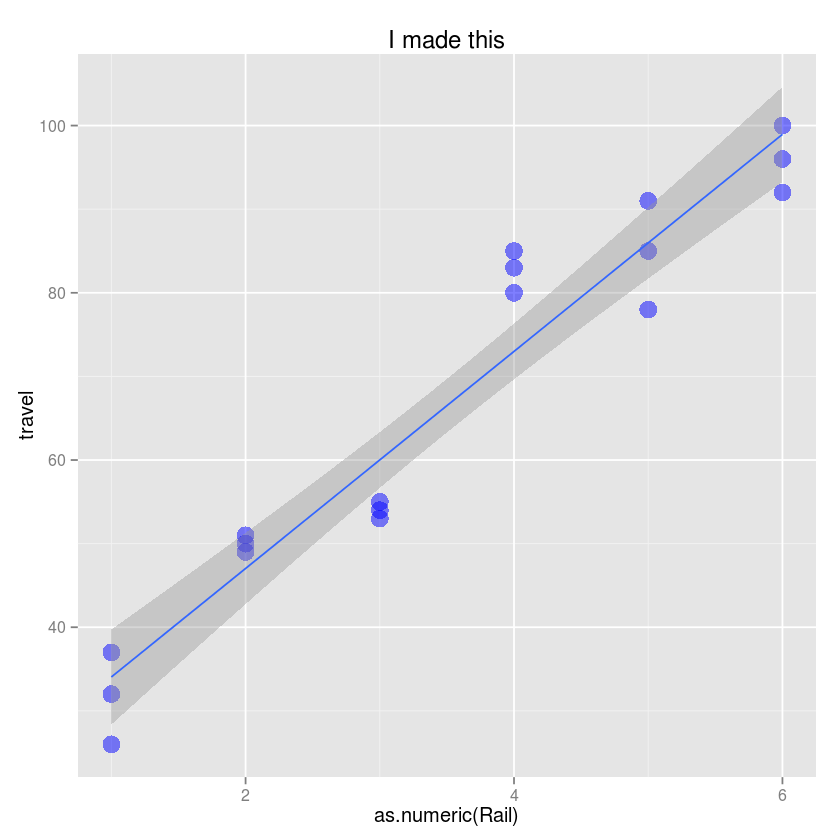

In [48]:
ggplot(Rail, aes(x=as.numeric(Rail), y=travel)) +
geom_point(size=5, color="blue", alpha=0.5) +
geom_smooth(method="lm") +
labs(title="I made this", ylab="Zero-force travel time (nano-seconds)")

#### Exercise 2

Here we will try to replicate the noise discovery heatmaps shown in the statistics class.

In [49]:
set.seed(123)

n <- 20 # number of subjects
m <- 20000 # number of genes 
alpha <- 0.005 # significance level

# create a matrix of gene expression values with m rows and 2*n columns
M <- matrix(rnorm(2*n*m), m, 2*n)

# give row and column names
rownames(M) <- paste("G", 1:m, sep="")
colnames(M) <- paste("id", 1:(2*n), sep="")

# assign subjects inot equal sized groups
grp <- factor(rep(0:1, c(n, n)))

# calculate p-value using t-test for mean experession value of each gene
pvals <- rowttests(M, grp)$p.value

# extract the genes which meet the specified significance level
hits <- M[pvals < alpha,]

- Use pheatmap to plot a heatmap
- Remove the row names (Use tAB or R's built-in help to figure out to do this)
- Use this color palette to map expression values to a red-blakc-green scale `colorRampPalette(c("red3", "black", "green3"))(50)`

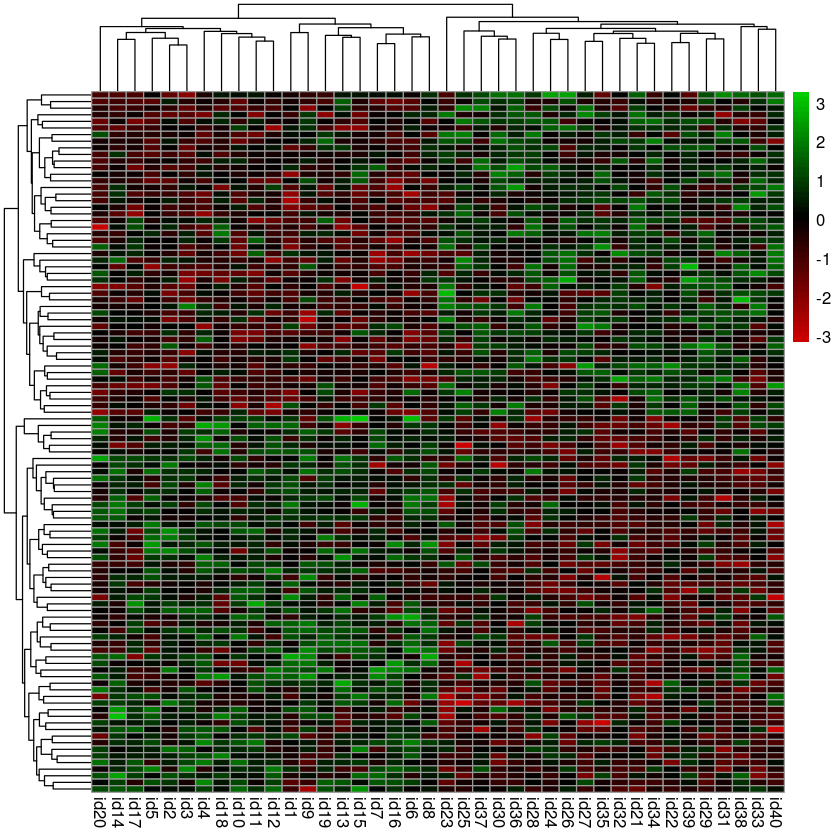

In [50]:
pheatmap(hits, show_rownames = FALSE, color = colorRampPalette(c("red3", "black", "green3"))(50))

In [51]:
a1 <- 1
a2 <- 2
sigma1 <- 25
sigma2 <- 25

subject <- paste("PID", rep(1:2, each=5))
dose <- rep(seq(10, 100, 20), 2)
geneA <- a1 * dose + rnorm(length(dose), sd=sigma1)
geneB <- a2 * dose + rnorm(length(dose), sd=sigma2)

df <- data.frame(subject=subject, dose=dose, geneA=geneA, geneB=geneB)

In [52]:
df

,subject,dose,geneA,geneB
1,PID 1,10,-3.367338,-31.18716
2,PID 1,30,54.03613,91.78636
3,PID 1,50,22.40099,124.477
4,PID 1,70,73.61274,111.6039
5,PID 1,90,84.05749,188.5058
6,PID 2,10,-13.63179,12.04911
7,PID 2,30,40.03472,57.40407
8,PID 2,50,64.98747,79.04738
9,PID 2,70,91.22307,147.4357
10,PID 2,90,70.94818,166.8696


**Exercise 3** 

Using `ggplot2`, plot gene expression agaisnt does, using differnt colors for differetn genes and differnet shapes for different subjects. (Hint: The `reshape2` library may come in useful)

In [53]:
md <- melt(df, id=c("subject", "dose"))

In [54]:
md

,subject,dose,variable,value
1,PID 1,10,geneA,-3.367338
2,PID 1,30,geneA,54.03613
3,PID 1,50,geneA,22.40099
4,PID 1,70,geneA,73.61274
5,PID 1,90,geneA,84.05749
6,PID 2,10,geneA,-13.63179
7,PID 2,30,geneA,40.03472
8,PID 2,50,geneA,64.98747
9,PID 2,70,geneA,91.22307
10,PID 2,90,geneA,70.94818


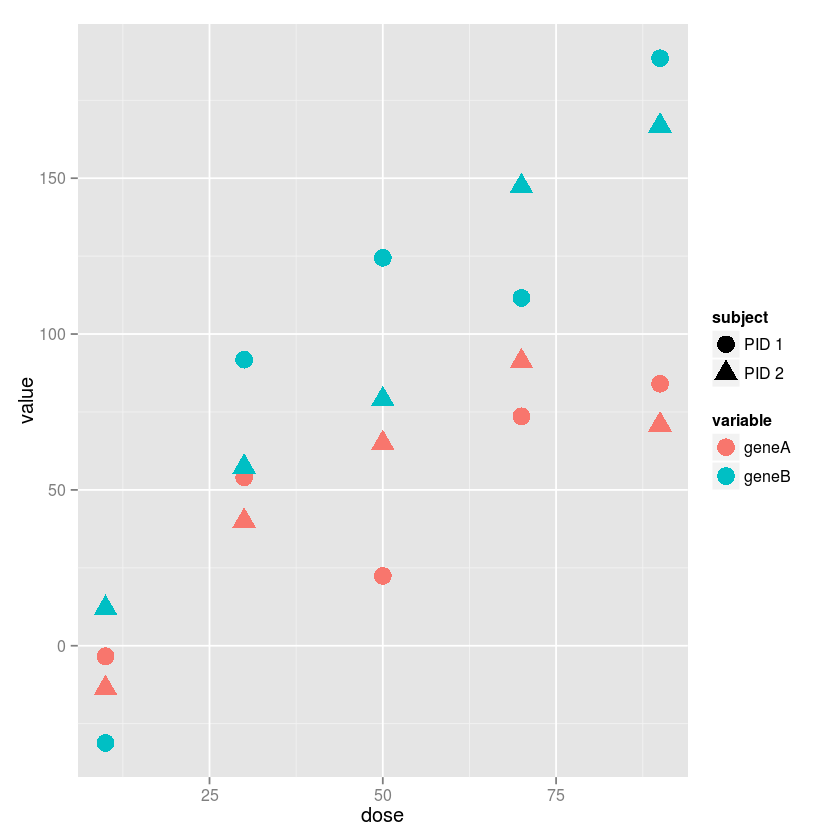

In [55]:
ggplot(md, aes(x=dose, y=value, color=variable, shape=subject)) + 
geom_point(size=5)

**Exercise 4**

Usign `ggplot2`, make a grid of plots with separae colummsn for each subject and separate rows for each gene. Vary the color and size by the gene expression value. Add a linear regression fit with 95% confidence intervals to each plot. 

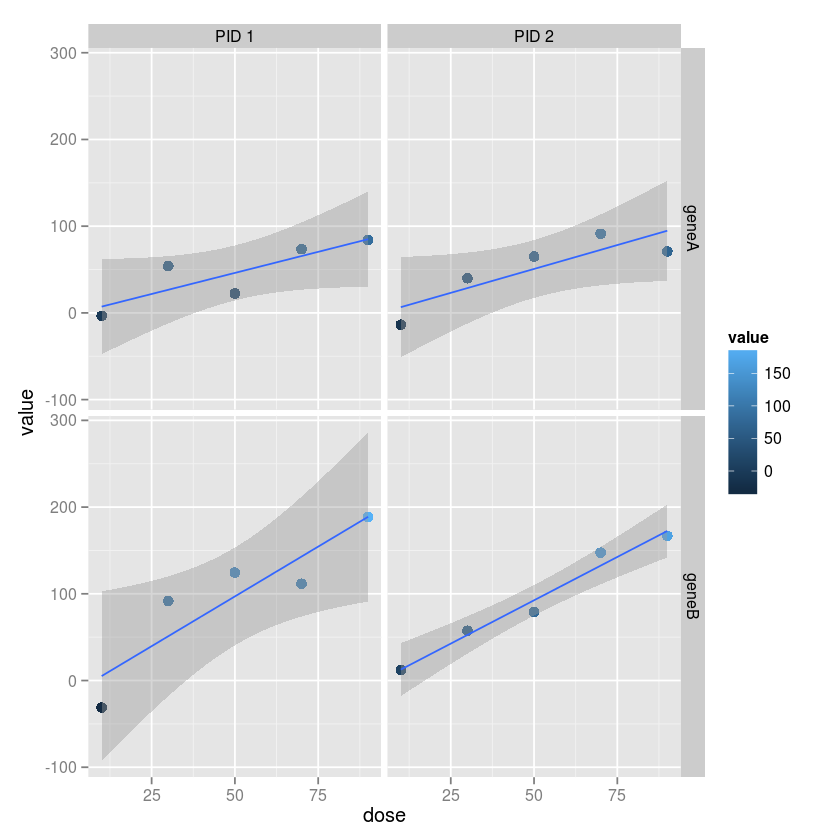

In [56]:
ggplot(md, aes(x=dose, y=value, color=value)) + 
geom_point(size=3) +
geom_smooth(method="lm") +
facet_grid(variable ~ subject)